In [ ]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

from sklearn.model_selection import train_test_split
from ast import literal_eval

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
import os
import tensorflow as tf

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")

No GPU found


## G3M

In [ ]:
df_2009_cpc = pd.read_csv('2009.csv', index_col=0)
df_2010_cpc = pd.read_csv('2010.csv', index_col=0)
df_2011_cpc = pd.read_csv('2011.csv', index_col=0)
df_2012_cpc = pd.read_csv('2012.csv', index_col=0)
df_2013_cpc = pd.read_csv('2013.csv', index_col=0)
df_2014_cpc = pd.read_csv('2014.csv', index_col=0)
df_2015_cpc = pd.read_csv('2015.csv', index_col=0)
df_2016_cpc = pd.read_csv('2016.csv', index_col=0)
df_2017_cpc = pd.read_csv('2017.csv', index_col=0)
df_2018_cpc = pd.read_csv('2018.csv', index_col=0)
df_2019_cpc = pd.read_csv('2019.csv', index_col=0)

In [ ]:
df_2009_cpc['cpc_subclass_list'] = df_2009_cpc.cpc_subclass.str.split(",")
df_2010_cpc['cpc_subclass_list'] = df_2010_cpc.cpc_subclass.str.split(",")
df_2011_cpc['cpc_subclass_list'] = df_2011_cpc.cpc_subclass.str.split(",")
df_2012_cpc['cpc_subclass_list'] = df_2012_cpc.cpc_subclass.str.split(",")
df_2013_cpc['cpc_subclass_list'] = df_2013_cpc.cpc_subclass.str.split(",")
df_2014_cpc['cpc_subclass_list'] = df_2014_cpc.cpc_subclass.str.split(",")
df_2015_cpc['cpc_subclass_list'] = df_2015_cpc.cpc_subclass.str.split(",")
df_2016_cpc['cpc_subclass_list'] = df_2016_cpc.cpc_subclass.str.split(",")
df_2017_cpc['cpc_subclass_list'] = df_2017_cpc.cpc_subclass.str.split(",")
df_2018_cpc['cpc_subclass_list'] = df_2018_cpc.cpc_subclass.str.split(",")
df_2019_cpc['cpc_subclass_list'] = df_2019_cpc.cpc_subclass.str.split(",")

In [ ]:
df_cpc = pd.concat([df_2009_cpc, df_2010_cpc, df_2011_cpc, df_2012_cpc, df_2013_cpc, df_2014_cpc, df_2015_cpc, df_2016_cpc, df_2017_cpc, df_2018_cpc, df_2019_cpc], axis=0, ignore_index=True)

In [ ]:
from sklearn.utils import shuffle
df_cpc = shuffle(df_cpc,random_state=101)

In [ ]:
#df_cpc = df_cpc[:500000]

In [ ]:
df_cpc.head()

,ID,Date,Title,Claim,cpc_subclass,cpc_subclass_list
1362643,8844051,2014-09-23,Method and apparatus for media relaying and mi...,"1. A method comprising: causing, at least in p...","G06F,H04W","[G06F, H04W]"
195358,7667610,2010-02-23,Producing an indication of solar panel conditi...,1. A method for producing an indication of sol...,"H01L,H02S,Y02E","[H01L, H02S, Y02E]"
2564566,10055600,2018-08-21,Analysis and specification creation for web do...,1. A method for rendering specification creati...,G06F,[G06F]
1985671,9472809,2016-10-18,Lithium ion secondary battery,1. A lithium ion secondary battery comprising ...,"H01M,Y02E,Y02T","[H01M, Y02E, Y02T]"
2829414,10324130,2019-06-18,Test decompressor and test method thereof,1. A test decompressor converting original inp...,"G01R,G06F","[G01R, G06F]"


In [ ]:
print(df_2009_cpc.shape)
print(df_2010_cpc.shape)
print(df_2011_cpc.shape)
print(df_2012_cpc.shape)
print(df_2013_cpc.shape)
print(df_2014_cpc.shape)
print(df_2015_cpc.shape)
print(df_2016_cpc.shape)
print(df_2017_cpc.shape)
print(df_2018_cpc.shape)
print(df_2019_cpc.shape)

(167315, 6)
(219592, 6)
(224466, 6)
(253023, 6)
(277945, 6)
(301406, 6)
(298545, 6)
(303043, 6)
(318819, 6)
(307741, 6)
(200452, 6)


In [ ]:
df_2009_cpc.shape[0]+df_2010_cpc.shape[0]+df_2011_cpc.shape[0]+df_2012_cpc.shape[0]+df_2013_cpc.shape[0]+df_2014_cpc.shape[0]+df_2015_cpc.shape[0]+df_2016_cpc.shape[0]+df_2017_cpc.shape[0]+df_2018_cpc.shape[0]+df_2019_cpc.shape[0]

2872347

In [ ]:
df_cpc.shape

(2872347, 6)

In [ ]:
print(f"There are {len(df_cpc)} rows in the dataset.")

There are 2872347 rows in the dataset.


In [ ]:
total_duplicate_titles = sum(df_cpc["Title"].duplicated())
print(f"There are {total_duplicate_titles} duplicate titles.")

There are 62834 duplicate titles.


In [ ]:
# df = df[~df["Title"].duplicated()]
# print(f"There are {len(df)} rows in the deduplicated dataset.")

# # There are some terms with occurrence as low as 1.
# print(sum(df["Subclass_labels"].value_counts() == 1))

# # How many unique terms?
# # print(arxiv_data["Subclass_labels"].nunique())

In [ ]:
test_split = 0.1

# Initial train and test split.
train_df, test_df = train_test_split(
    df_cpc,
    test_size=test_split
)

# Splitting the test set further into validation
# and new test sets.
val_df = test_df.sample(frac=0.5)
test_df.drop(val_df.index, inplace=True)

print(f"Number of rows in training set: {len(train_df)}")
print(f"Number of rows in validation set: {len(val_df)}")
print(f"Number of rows in test set: {len(test_df)}")

Number of rows in training set: 2585112
Number of rows in validation set: 143618
Number of rows in test set: 143617


In [ ]:
Subclass_labels = tf.ragged.constant(train_df["cpc_subclass_list"].values)
lookup = tf.keras.layers.StringLookup(output_mode="multi_hot")
lookup.adapt(Subclass_labels)
vocab = lookup.get_vocabulary()


def invert_multi_hot(encoded_labels):
    """Reverse a single multi-hot encoded label to a tuple of vocab Subclass_labels."""
    hot_indices = np.argwhere(encoded_labels == 1.0)[..., 0]
    return np.take(vocab, hot_indices)


print("Vocabulary:\n")
print(vocab)

Vocabulary:

['[UNK]', 'G06F', 'H04L', 'H01L', 'Y10T', 'H04N', 'H04W', 'A61B', 'A61K', 'G06Q', 'G01N', 'G02B', 'H04B', 'G06K', 'G06T', 'Y10S', 'Y02E', 'Y02T', 'H04M', 'C07D', 'H05K', 'G11C', 'C12N', 'A61F', 'C07K', 'A61M', 'G09G', 'G02F', 'G11B', 'G01R', 'Y02P', 'H01M', 'C08L', 'B29C', 'G03G', 'B01D', 'H01R', 'C07C', 'Y02D', 'B41J', 'H02J', 'G01S', 'E21B', 'B01J', 'B82Y', 'B60R', 'H05B', 'A61N', 'B65D', 'H03K', 'H02M', 'B32B', 'Y02B', 'C12Q', 'G05B', 'C08G', 'G03F', 'H01J', 'C23C', 'H04R', 'F16H', 'G01C', 'B60K', 'A63B', 'C09D', 'A61L', 'F21V', 'C09K', 'G10L', 'G07F', 'C08K', 'H01Q', 'G03B', 'H03M', 'Y02A', 'B62D', 'H02K', 'C08F', 'B60W', 'B60L', 'G08B', 'F05D', 'F02D', 'F01D', 'H04J', 'C01B', 'B29L', 'G01B', 'B29K', 'F21Y', 'G05D', 'B23K', 'A63F', 'B65H', 'H01F', 'G16H', 'C08J', 'G06N', 'H01H', 'G08G', 'F16L', 'H03F', 'F02M', 'F16K', 'C04B', 'A61Q', 'H01S', 'G01J', 'F16B', 'C12P', 'C02F', 'F16D', 'F16C', 'C07F', 'B64C', 'B65G', 'B64D', 'F01N', 'A01N', 'A23L', 'G07C', 'A01K', 'F21S', '

In [ ]:
print(len(vocab))

665


In [ ]:
sample_label = train_df["cpc_subclass_list"].iloc[0]
print(f"Original label: {sample_label}")

label_binarized = lookup([sample_label])
print(f"Label-binarized representation: {label_binarized}")

Original label: ['C12M', 'C12N']
Label-binarized representation: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [ ]:
train_df["Claim"].apply(lambda x: len(x.split(" "))).describe()

count    2.585112e+06
mean     1.619241e+02
std      1.006883e+02
min      2.000000e+00
25%      9.500000e+01
50%      1.450000e+02
75%      2.080000e+02
max      1.216100e+04
Name: Claim, dtype: float64

In [ ]:
max_seqlen = 161
batch_size = 32
padding_token = "<pad>"
auto = tf.data.AUTOTUNE


def unify_text_length(text, label):
    # Split the given abstract and calculate its length.
    word_splits = tf.strings.split(text, sep=" ")
    sequence_length = tf.shape(word_splits)[0]

    # Calculate the padding amount.
    padding_amount = max_seqlen - sequence_length

    # Check if we need to pad or truncate.
    if padding_amount > 0:
        unified_text = tf.pad([text], [[0, padding_amount]], constant_values="<pad>")
        unified_text = tf.strings.reduce_join(unified_text, separator="")
    else:
        unified_text = tf.strings.reduce_join(word_splits[:max_seqlen], separator=" ")

    # The expansion is needed for subsequent vectorization.
    return tf.expand_dims(unified_text, -1), label


def make_dataset(dataframe, is_train=True):
    labels = tf.ragged.constant(dataframe["cpc_subclass_list"].values)
    label_binarized = lookup(labels).numpy()
    dataset = tf.data.Dataset.from_tensor_slices(
        (dataframe["Claim"].values, label_binarized)
    )
    dataset = dataset.shuffle(batch_size * 10) if is_train else dataset
    dataset = dataset.map(unify_text_length, num_parallel_calls=auto).cache()
    return dataset.batch(batch_size)

In [ ]:
train_dataset = make_dataset(train_df, is_train=True)
validation_dataset = make_dataset(val_df, is_train=False)
test_dataset = make_dataset(test_df, is_train=False)

In [ ]:
text_batch, label_batch = next(iter(train_dataset))

for i, text in enumerate(text_batch[:5]):
    label = label_batch[i].numpy()[None, ...]
    print(f"claim: {text[0]}")
    print(f"Label(s): {invert_multi_hot(label[0])}")
    print(" ")

claim: b'1. A method for the remediation of contaminated soil comprising: adding a heat-activated oxidizing agent into the soil, such soil including pore water; exposing the soil to direct current through a first set of electrodes so as to cause migration of the oxidizing agent through the soil and pore water; and exposing the soil to alternating current through a second set of electrodes so as to heat the soil and thus to activate the oxidizing agent.<pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>'
Label(s): ['C25B' 'B09C']
 
claim: b'1. An electronic appliance comprising: a speaker which subjects a first voice si

In [ ]:
train_df["total_words"] = train_df["Claim"].str.split().str.len()
vocabulary_size = train_df["total_words"].max()
print(f"Vocabulary size: {vocabulary_size}")

Vocabulary size: 12161


In [ ]:
text_vectorizer = layers.TextVectorization(
    max_tokens=vocabulary_size, ngrams=2, output_mode="tf_idf"
)

# `TextVectorization` layer needs to be adapted as per the vocabulary from our
# training set.
with tf.device("/CPU:0"):
    text_vectorizer.adapt(train_dataset.map(lambda text, label: text))

train_dataset = train_dataset.map(
    lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto
).prefetch(auto)
validation_dataset = validation_dataset.map(
    lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto
).prefetch(auto)
test_dataset = test_dataset.map(
    lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto
).prefetch(auto)

In [ ]:
def make_model():
    shallow_mlp_model = keras.Sequential(
        [
            layers.Dense(512, activation="relu"),
            layers.Dense(256, activation="relu"),
            layers.Dense(lookup.vocabulary_size(), activation="sigmoid"),
        ]  # More on why "sigmoid" has been used here in a moment.
    )
    return shallow_mlp_model

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
epochs = 3

shallow_mlp_model = make_model()
shallow_mlp_model.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["categorical_accuracy",f1_m,precision_m, recall_m]
)

history = shallow_mlp_model.fit(
    train_dataset, validation_data=validation_dataset, epochs=epochs
)

Epoch 1/3


59683/80785 [=====================>........] - ETA: 38:30 - loss: 0.0093 - categorical_accuracy: 0.4765 - f1_m: 0.4304 - precision_m: 0.7428 - recall_m: 0.3070

80785/80785 [==============================] - 9098s 113ms/step - loss: 0.0092 - categorical_accuracy: 0.4797 - f1_m: 0.4342 - precision_m: 0.7466 - recall_m: 0.3101 - val_loss: 0.0089 - val_categorical_accuracy: 0.4816 - val_f1_m: 0.4379 - val_precision_m: 0.7581 - val_recall_m: 0.3115recall_m: 0.31 - ETA: 0s - loss: 0.0092 - categorical_accuracy: 0.4797 - f1_m: 0.4342 - precision_m: 0.7466 - recall_m: 0. - ETA: 0s - loss: 0.0092 - categorical_accuracy: 0.4797 - f1_m: 0.4342 - precision_m: 0.7466 - recall
Epoch 2/3


 7185/80785 [=>............................] - ETA: 2:12:54 - loss: 0.0088 - categorical_accuracy: 0.4910 - f1_m: 0.4497 - precision_m: 0.7587 - recall_m: 0.3233- ETA: 2:22:15 - loss: 0.0088 - categorical_accuracy: 0.4889 - f1_m: 0.4504 - precision_m: 0.7601  - ETA: 2:22:12 - loss: 0.0088 - categorical_accuracy:  - ETA: 2:22:02 - loss: 0.0088 - categorical_accuracy: 0.4891 - f1_m: 0.4503 -  - ETA: 2:21:56 - loss: 0.0088 - categorical_accuracy: 0.4888 - f1_m: 0.4502 - precision_m: 0.7601 -  - ETA: 2:21:54 - loss: 0.0089 - categorical_accuracy: 0.4888 - f1_m: 0.4502 - precision_m: 0.7600 - recall_ - ETA: 2:21:53 - loss: 0.0089 - categorical_accuracy: 0.4887 - f1_m: 0.4501 - precision_m: 0.7600 - r - ETA: 2:21:50 - loss: 0.0089 - categorical_accurac  - ETA: 2:21:05 - loss: 0.0088 - categorical_accuracy: 0.4888 - f1_m: - ETA: 2:20:42 - loss: 0.0088 - categorical_accuracy: 0.4893 - f1_m: 0.4506 - precision_m: 0.7592 - recall_m - ETA: 2:20:40 - loss: 0.0088 - categorical_accuracy: 0.4893 - f

11240/80785 [===>..........................] - ETA: 2:06:01 - loss: 0.0088 - categorical_accuracy: 0.4924 - f1_m: 0.4502 - precision_m: 0.7586 - recall_m: 0.3239- ETA: 2:12:53 - loss: 0.0088 - categorical_accuracy: 0.4910 - f1_m: 0.4497 - precision_m - ETA: 2:12:50 - loss: 0.0088 - categori - ETA: 2:12:27 - loss: 0.0088 - categorical_accuracy: 0.4913 - f1_m: 0.4499 - precision_m: 0.7591 - recall_m:  - ETA: 2:12:26 - loss: 0.0088 - categorical_accuracy: 0.4913 - f1_m: 0.4499 - precision_m: 0.7591 - recall_m: - ETA: 2:12:25 - loss: 0.0088 - categorical_accuracy: 0.4913 - f1_m: 0.4500 - precision_m: 0.7591 - recall_m:  - ETA: 2:12:25 - loss: 0.0088 - categorical_accuracy: 0.4914 - f1_m: 0.4500 - precision_m: 0.7591 - - ETA: 2:12:23 - loss: 0.0088 - categorical_accuracy: 0.4914 - f1_m: 0.4500 - precision_m: 0.7592  - ETA: 2:12 - ETA: 2:12:08 - loss: 0.0088 - categorical_accuracy: 0.4915 - f1_m: 0.4501 - precision_m - ETA: 2:12:05 - loss: 0.0088 - categorical_accuracy: 0.4916 - f1_m: 0.4502

16247/80785 [=====>........................] - ETA: 1:57:37 - loss: 0.0088 - categorical_accuracy: 0.4930 - f1_m: 0.4507 - precision_m: 0.7588 - recall_m: 0.3244- ETA: 2:05:54 - loss: 0.0088 - categorical_accuracy: 0.4924 - f1_m: 0.4502 - precision_m: 0.7587 - recall_m: 0. - ETA: 2:05:53 - loss: 0.0088 - categorical_accuracy: 0.4924 - f1_m: 0.4503 - preci - ETA: 2 - ETA: 2:05:37 - loss: 0.0088 - categorical_accuracy: 0.4925 - f1_m: 0.4503 - precision_m: 0 - ETA: 2:05:34 - loss: 0.0088 - cat - ETA: 2:05:11 - loss: 0.0088 - categorical_accuracy: 0.4924 - f1_m: 0.4503 - precision_m: 0.7586 - recall_m:  - ETA: 2:05:10 - loss: 0.0088 - categorical_accuracy: 0.4924 - f1_m: 0.4503 - precision_m: 0.7586 - recal - ETA: 2:05:09 - loss: 0.0088 - categorical_accuracy: 0.4925 -  - ETA: 2:05:03 - loss: 0.0088 - categorical_accuracy: 0.4925 - f1_m: 0.4503 - precision_m: 0.7587 - recall_m:  - ETA: 2:05:02 - loss: 0.0088 - categorical_accuracy: 0.4925 - f1_m: 0.4503 - precision_ - ETA: 2:04:59 - loss: 

20192/80785 [======>.......................] - ETA: 1:50:07 - loss: 0.0088 - categorical_accuracy: 0.4931 - f1_m: 0.4510 - precision_m: 0.7586 - recall_m: 0.3247- ETA: 1:57:31 - loss: 0.0088 - categorical_accuracy: 0.4929 - f1_m: 0.4506 - precision_m: 0.7588 - recall_m - ETA: 1:57:31 - loss: 0.0088 - categorical_accuracy: 0.4929 - f1_m: 0.4506 - precision_m: 0.7588 - recall_m - ETA: 1:57:30 - loss: 0.0088 - categorical_accuracy: 0.4929 - f1_m: 0.4506 - precision_m: 0.7588 - recall_m: 0.324 - ETA: 1:57:30 - loss: 0.0088 - categorical_accuracy: 0.4929 - f1_m: 0.4506 - precision_m: 0.7 - ETA: 1:57:27 - loss: 0.0088 - categorical_accuracy: 0. - ETA: 1:57:20 - loss: 0.0088 - categorical_accuracy: 0.4929 - f1_m - ETA: 1:57:1 - ETA: 1:57:02 - loss: 0.0088 - categorical_accuracy: 0.4929 - f1_m: 0.4506 - precision_m: 0.7587  - ETA: - ETA: 1:56:48 - loss: 0.0088 - categorical_accuracy: 0.4929 - f1_m: 0.4507 - precision_m: 0.7588 - recall_m: 0.324 - ETA: 1:56:47 - loss: 0.0088 - categorical_accur

24075/80785 [=======>......................] - ETA: 1:42:54 - loss: 0.0088 - categorical_accuracy: 0.4938 - f1_m: 0.4515 - precision_m: 0.7592 - recall_m: 0.3252- ETA: 1:50:05 - loss: 0.0088 - categorical_accuracy: 0.4931 - f1_m: 0.4509 - precision_m: 0.7586 - rec - ETA: 1:50:03 - loss: 0.0088 - categorical_accuracy: 0.4931 - f1_m: 0.4509 - precisio - ETA: 1:50:00 - loss: 0.0088 - categorical_accuracy: 0.4931 - f1_m: 0.4509 - precision_m: 0.7586 - recall_m: - ETA: 1:49:59 - loss: 0.0088 - categorical_accuracy: 0.4931 - f1_m: 0.4509 -  - ETA: 1:49:54 - loss: 0.0088 - categorical_accuracy: 0.4931 - f1_m: 0.4509 - preci - ETA: 1:49:51 - loss: 0.0088 - categorical_accuracy: 0.4931 - f1_m: 0.45 - ETA: 1:49:46 - loss: 0.0088 - categorical_accuracy: 0.4931 - f1_m: 0.4509 - prec - ETA: 1:49:42 - loss: 0.0088 - categorical_accuracy: 0.4931 - f1_m: 0.4509 - precision_m: 0.7586  - ETA: 1:49:40 - loss: 0 - ETA: 1:49:29 - loss: 0.0088 - categorical_accuracy: 0.4932 - f1_m: 0.4510 - precision_m: 0.7

27504/80785 [=========>....................] - ETA: 1:36:33 - loss: 0.0088 - categorical_accuracy: 0.4940 - f1_m: 0.4518 - precision_m: 0.7596 - recall_m: 0.3254- ETA: 1:42:52 - loss: 0.0088 - categorical_accuracy: 0.4938 - f1_m: 0.4515 - precision_m: 0.7592 - reca - ETA: 1:42:50 - loss: 0.0088 - categorical_accuracy: 0.4937 - f1_m: 0.4515 - precision_m: 0. - ETA: 1:42:48 - loss: 0.0088 - categorical_accuracy: 0.4938 - f1_m: 0.4515 - precision_m: 0.7592 - recall_m: 0. - ETA: 1:42:47 - loss: 0.0088 - categorical_accuracy: 0.4937 - f1_m: 0.4515 - precision_m: 0.7592 - re - ETA: 1:42:46 - loss: 0.0088 - categorical_accuracy: 0.4937 - f1_m: 0.4515 - precision_m: 0.7592 - recall_m: - ETA: 1:42:45 - loss: 0.0088 - categorical_accuracy: 0.4938 - f1_m: 0.4515 - precision_m: 0.7592 - recall_m: 0. - ETA: 1:42:44 - loss: 0.0088 - categorical_accuracy: 0.4938 - f1_m: 0.4515 - precision_m: 0. - ETA: 1:42:42 - loss: 0.0088 - categorical_accuracy: 0.4937 - ETA: 1:42:36 - loss: 0.0088 - categorical_ac

30359/80785 [==========>...................] - ETA: 1:31:16 - loss: 0.0088 - categorical_accuracy: 0.4944 - f1_m: 0.4521 - precision_m: 0.7596 - recall_m: 0.3258- ETA: 1:36:3 - ETA: 1:36:18 - loss: 0.0088 - categorical - ETA: 1:36:10 - loss: 0.0088 - categorical_accuracy: 0.4941 - f1_m: 0.4518 - - ETA: 1:36:06 - loss: 0.0088 - categorical_accuracy: 0.4941 - f1_m: 0.4518 - precision_m: 0.7596 - re - ETA: 1:36:04 - loss: 0.0088 - categorical_accuracy: 0.4941 - f1_m: 0.4518 - precision_m: 0.7596 - recall_m: 0.325 - ETA: 1:36:04 - loss: 0.0088 - categorical_accuracy: 0.4941 - f1_m: 0.4518 - precision_m: 0.759 - ETA: 1:36:02 - loss: 0.0088 - categorical_accuracy: 0.4941 - f1_m: 0.4518 - precision_m: 0.7596 - reca -  - ETA: 1:35:48 - loss: 0.0088 - categorical_accuracy: 0.4941 - f1_m: 0.4518 - precision_m: 0.7596 - recall_m: - ETA: 1:35:47 - loss: 0.0088 - categorical_accuracy: 0.4941 - f1_m: 0.4518 - precision_m: 0.7596 - reca - ETA: 1:35:45 - loss: 0.0088 - categorical_accuracy: 0.4941 - f

32238/80785 [==========>...................] - ETA: 1:27:48 - loss: 0.0088 - categorical_accuracy: 0.4943 - f1_m: 0.4522 - precision_m: 0.7596 - recall_m: 0.3258- ETA: 1:31:12 - loss: 0.0088 - categorical_accuracy: 0.4944 - f1_m: 0.4522 - precision_m: 0.7596 - recall - ETA: 1:31:11 - loss: 0.0088 - categorical_accuracy: 0 - ETA: 1:31:04 - loss: 0.0088 - categorical_accuracy: 0.4944 - f1_m: 0.4522 - precision_m: - ETA: 1:31:01 - loss: 0.0088 - categorical_accuracy: 0.4944 - f1_m: 0.4522 - precision_m: 0.7596 - recall_ - ETA: 1:31:00 - loss: 0.0088 - categorical_accuracy: 0.4944 - f1_m: 0.4522 - precision_m: 0.7596 - recall_m: 0. - ETA: 1:31:00 - loss: 0.0088 - categorical_accuracy: 0.4944 - f1_m: 0.4522 - precision_m: 0.7596 - recall_m: 0. - ETA: 1:31:00 - loss: 0.0088 - categorical_accuracy: 0.4944 - f1_m: 0.4522 - precision_m: 0.7596 - recall_m: - ETA: 1:30:59 - loss: 0.0088 - categorical_accuracy: 0.4944 - f1_m: 0.4522 - precision_m: 0.7596 - recall - ETA: 1:30:58 - loss: 0.0088 - ca

34957/80785 [===========>..................] - ETA: 1:22:54 - loss: 0.0088 - categorical_accuracy: 0.4947 - f1_m: 0.4523 - precision_m: 0.7599 - recall_m: 0.3259- ETA: 1:27:48 - loss: 0.0088 - categorical_accuracy: 0.4943 - f1_m: 0.4522 - precision_m: 0.7596 - recall_m: 0.3 - ETA: 1:27:48 - loss: 0.0088 - categorical_accuracy: 0.4943 - f1_m: 0.4522 - precision_m: 0. - ETA: 1:27:45 - loss: 0.0088 - categorical_accuracy: 0.4943 - f1_m:  - ETA: 1:27:40 - loss: 0.0088 - categorical_accur - ETA: 1:27:33 - loss: 0.0088 - categorical_accuracy: 0.4943 - f1_m: 0.4522 - precision_m: 0.7596 - recall_m: 0.32 - ETA: 1:27:33 - loss: 0.0088 - categorical_accuracy: 0.4943 - f1_m: 0.4522 - precision_m: 0.7596 - recall_m: 0.32 - ETA: 1:27:32 - loss: 0.0088 - categorical_accuracy: 0.4943 - f1_m: 0.4522 - precision_m: 0.7596 - recall_m: 0.32 - ETA: 1:27:32 - loss: 0.0088 - categorical_accuracy: 0.4943 - f1_m: 0.4522 - precision_m: 0.7596 - recall_m: 0. - ETA: 1:27:32 - loss: 0.0088 - categorical_accura - 

37779/80785 [=============>................] - ETA: 1:17:44 - loss: 0.0088 - categorical_accuracy: 0.4948 - f1_m: 0.4524 - precision_m: 0.7598 - recall_m: 0.3260- ETA: 1:22:53 - loss: 0.0088 - categorical_accuracy: 0.4947 - f1_m: 0.4523 - precision_m: 0.7599 - recall_m: 0 - ETA: 1:22:52 - loss: 0.0088 - categorical_accuracy: 0.4947 - f1_m: 0.4523 -  - ETA: 1:22:48 - loss: 0.0088 - categorical_accuracy: 0.4947 - f1_m: 0.4523 - precision_m: 0.7599 -  - ETA: 1:22:46 - loss: 0.0088 - categorical_accuracy: 0.4947 - f1_m: 0.4523 - precision_m: 0.7598 - recal - ETA: 1:22:45 - loss: 0.0088 - categorical_accuracy: 0.4947 - f1_m: 0.4523 - precision_m: 0.7598 - r - ETA: 1:22:44 - loss: 0.0088 - categorical_accuracy: 0.4947 - f1_m: 0.4523 - precision_m: 0.7598 - recall - ETA: 1:22:43 - loss: 0.0088 - categorical_accuracy: 0.4947 - f1_m: 0.4523 - precision_m: 0.759 - ETA: 1:22:40 - loss: 0.0088 - categorical_accuracy: 0.4947 - f1_m - ETA: 1:22:35 - loss: 0.0088 - categorical_accuracy: 0.4947 - f1_m

40926/80785 [==============>...............] - ETA: 1:12:02 - loss: 0.0088 - categorical_accuracy: 0.4953 - f1_m: 0.4528 - precision_m: 0.7601 - recall_m: 0.3263- ETA: 1:17:43 - loss: 0.0088 - categorical_accuracy: 0.4948 - f1_m: 0.4524 - precision_m: 0.7598 - recall_m: 0. - ETA: 1:17:42 - loss: 0.0088 - categorical_accuracy: 0.4949 - f1_m: 0.4524 - precision_m: 0. - ETA: 1:17:40 - loss: 0.0088 - categorical_accuracy: 0.4948 -  - ETA: 1:17:34 - loss: 0.0088 - categorical_accuracy: 0.4948 - f1_m: 0.4524 - p - ETA: 1:17:07 - loss: 0.0088 - categorical_accuracy: 0.4949 - f1_m: 0.4524 - precision_m: 0.7599 - reca - ETA: 1:17:05 - loss: 0.0088 - categorical_accuracy: 0.4949 - f1_m: 0.4524 - precision_m: 0.7599 - - ETA: 1:17:03 - loss: 0.0088 - categorical_accuracy: 0.4949 - f1_m: 0.4525 - precision_m: 0.7599 - ETA: 1:17:01 - loss: 0.0088 - categorical_accuracy: 0.4949 - f1_m: 0.4525 - precision_m: 0.7599 - recall_m - ETA: 1:17:00 - loss: 0.0088 - categorical_accuracy: 0.4949 - f1_m: 0.4525 

43898/80785 [===============>..............] - ETA: 1:06:39 - loss: 0.0088 - categorical_accuracy: 0.4953 - f1_m: 0.4529 - precision_m: 0.7602 - recall_m: 0.3264- ETA: 1:11:58 - loss: 0.0088 - categorical_accuracy: 0.4953 - f1_m: 0.4528 - p - ETA: 1:11:54 - loss: 0.0088 - categorical_accuracy: 0.4953 - f1_m: 0.4528 - precision_m: 0.7601 - recall - ETA: 1:11:53 - loss: 0.0088 - categorical_accuracy: 0.4953 - f1_m: 0.4528 - precision_m: 0.7601 - recall_m: 0. - ETA: 1:11:53 - loss: 0.0088 - categorical_accuracy: 0.4953 - f1_m: 0.4528 - precision_m: 0.7601 - recall_m: 0.3 - ETA: 1:11:52 - loss: 0.0088 - categorical_accuracy: 0.4953 - f1_m: 0.4528 - precis - ETA: 1:11:49 - loss: 0.0088 - categorical_accuracy: 0.4953 - f1_m: 0.4528 - - ETA: 1:11:44 - loss: 0.0088 - categorical_accuracy: 0.4953 - f1_m: 0.4528 - precision_m: 0.7601 - recall_m: 0.3 - ETA: 1:11:44 - loss: 0.0088 - ca - ETA: 1:11:35 - loss: 0.0088 - categorical_accuracy: 0.4953 - f1_m: 0.4528 - precision_m: 0.7601 - re - ETA: 1:1

47792/80785 [================>.............] - ETA: 59:39 - loss: 0.0088 - categorical_accuracy: 0.4957 - f1_m: 0.4533 - precision_m: 0.7604 - recall_m: 0.3268  - ETA: 1:06:31 - loss: 0.0088 - categorical_accuracy: 0.4953 - f1_m: 0.4529 - precision_m: 0.7602 - recall_m: 0.3 - ETA: 1:06:30 - loss: 0.0088 - categorical_accuracy: 0.4953 - f1_m: 0.452 - ETA: 1:06:26 - loss: 0.0088 - categorical_accuracy: 0.4953 - f1_m: 0.4529 - precision_m: 0.7602 - recall_m: 0.3 - ETA: 1:06:26 - loss: 0.0088 - categorical_accuracy: 0.4953 - f1_m: 0.4 - ETA: 1:06:21 - loss - ETA: 1:06:11 - loss: 0.0088 - categorical_accuracy: 0.4953 - f1_m: 0.4529 - precision_m: 0.7602 - recall_m: 0.326 - ETA: 1:06:10 - loss: 0.0088 - categorical_accuracy: 0.4953 - f1_m: 0.4529 - precision_m: 0.7 - ETA: 1:06:08 - loss: 0.0088 - categorical_accuracy: 0.4953 - f1_m: 0.4529 - precision_m: 0.7602 - rec - ETA: 1:06:07 - loss: 0.0088 - categorical_accuracy: 0.4953 - f1_m: 0.4529 - precision_m: 0 - ETA: 1:06:04 - loss: 0.0088 - c

50550/80785 [=================>............] - ETA: 54:40 - loss: 0.0088 - categorical_accuracy: 0.4958 - f1_m: 0.4535 - precision_m: 0.7606 - recall_m: 0.3270- ETA: 59:39 - loss: 0.0088 - categorical_accuracy: 0.4957 -  - ETA: 59:20 - loss: 0.0088 - categorical_accuracy: 0.4957 - f1_m: 0.4534 - preci - ETA: 59:17 - loss: 0.0088 - categorical_accuracy: 0.4957 - f1_m: 0.4534 - precision_m: 0.76 - ETA: 59:14 - loss: 0.0088 - categorical_accuracy: 0.4957 - f1_m: 0.4534 - precision_m: - ETA: 59:12 - loss: 0.0088 - categorical_accuracy: 0.4957 - f1_m: 0.4534 - precision_m: 0.7605 - recall_m: 0. - ETA: 59:11 - loss: 0.0088 - categorical_accuracy: 0.4957 - f1_m: 0.4534 - - ETA: 59:07 - loss: 0.0088 - categorical_accuracy: 0.4957 - f1_m: 0.4534 - prec - ETA: 59:03 - loss: 0.0088 - categorical_accuracy: 0.4957 - f1_m: 0.4534 - precision_m: 0.7605 - reca - ETA: 59:02 - loss: 0.0088 - categorical_accuracy: 0.4957 - f1_m: 0.4534 - precisio - ETA: 58:59 - loss: 0.0088 - categorical_accuracy: 0.4957

53546/80785 [==================>...........] - ETA: 49:13 - loss: 0.0088 - categorical_accuracy: 0.4961 - f1_m: 0.4536 - precision_m: 0.7607 - recall_m: 0.3270- ETA: 54:38 - loss: 0.0088 - categorical_accuracy: 0.4958 - f1 - ETA: 54:33 - loss: 0.0088 - categorical_accuracy: 0.4958 - f1_m: 0.4535 - preci - ETA: 54:29 - loss: 0.0088 - categorical_accuracy: 0.4958 - f1_m: 0.4535 - precision_m: 0.7606 - recall_m - ETA: 54:28 - loss: 0.0088 - categorical_accuracy: 0.4958 - f1_m: 0.4535 - precision_m: 0.7606 - recall_m: 0.3 - ETA: 54:28 - loss: 0.0088 - categorical_accuracy: 0.4958 - f1_m: 0.4535 - precision_m: 0.7606 - reca - ETA: 54:27 - loss: 0.0088 - categorical_accuracy: 0.4958 - f1_m: 0.4535 - precision_m: 0 - ETA: 54:24 - loss: 0.0088 - categor - ETA: 54:16 - loss: 0.0088 - categorical_accuracy: 0.4958 - f1_m: 0.4535 - precisi - ETA: 54:12 - loss: 0.0088 - categorical_accuracy: 0.4958 - f1_m: 0.4535 - precision_m: 0.7606 - recall_m: 0. - ETA: 54:12 - loss: 0.0088 - categorical_accurac

56015/80785 [===================>..........] - ETA: 44:44 - loss: 0.0088 - categorical_accuracy: 0.4963 - f1_m: 0.4538 - precision_m: 0.7609 - recall_m: 0.3272- ETA: 49:13 - loss: 0.0088 - categorical_accuracy: 0.4961 - f1_m: 0.4536 - precision_m: 0.7607 - recall_m: - ETA: 49:12 - loss: 0.0088 - categorical_accuracy: 0.4961 - f1_m: 0.4536 - precision_m: 0.7607 - recall_m: 0.3 - ETA: 49:12 - loss: 0.0088 - categorical_accuracy:  - ETA: 49:05 - loss: 0.0088 - categorical_accuracy: 0.4961 - f1_m: 0.4536 - precision_m: 0.76 - ETA: 49:03 - loss: 0.0088 - categorical_accuracy: 0.4961 - f1_m: 0.4536 - precision_m: 0. - ETA: 49:00 - loss: 0.0088 - categorical_accuracy: 0.4961 - f1_m: 0.4536 - precision_m: 0.7607 - rec - ETA: 48:59 - loss: 0.0088 - categorical_ - ETA: 48:51 - loss: 0.0088 - categorical_accuracy: 0.4961 - f1_m: 0.4536 - precision_m: 0.7607 - recall_m:  - ETA: 48:50 - loss: 0.0088 - categorical_accuracy: 0.4961 - f1_m: 0.4536 - precision_m: 0.7607 - recall_m - ETA: 48:49 - loss: 

59563/80785 [=====================>........] - ETA: 38:18 - loss: 0.0088 - categorical_accuracy: 0.4964 - f1_m: 0.4539 - precision_m: 0.7610 - recall_m: 0.3274- ETA: 44:43 - loss: 0.0088 - categorical_accuracy: 0.4963 - f1_m: 0.4538 - precision_m: 0.7609 - recall_m - ETA: 44:42 - loss: 0.0088 - categorical_accuracy: 0.4963 - f1_m: 0.4538 - precisi - ETA: 44:39 - loss: 0.0088 - categorical_accuracy: 0.4963 - f1_m: 0.4538 - precision_m: 0.7609 - recall_m:  - ETA: 44:38 - loss: 0.0088 - categorical_accuracy: 0.4963 - f1_m: 0.4538 - precision_m - ETA: 44:35 - loss: 0.0088 - categorical_accuracy: 0.4963 - f1_m: 0.4538 - precision_m - ETA: 44:32 - loss: 0.0088 - categorical_accuracy: 0.4963 - f1_m: 0.4538 - precision_m: 0.7609 - recall_m: 0 - ETA: 44:32 - loss: 0.0088 - categorical_accuracy: 0.4963 - f1_m: - ETA: 44:27 - loss: 0.0088 - categorical_accuracy: 0.4963 - f1_m: 0.453 - ETA: 44:22 - loss: 0.0088 - categorical_accuracy: 0.4963 - f1_m: 0.4538 - precision_m: 0.7609 - recall_m: 0 - ETA

64310/80785 [======================>.......] - ETA: 29:44 - loss: 0.0088 - categorical_accuracy: 0.4966 - f1_m: 0.4543 - precision_m: 0.7613 - recall_m: 0.3277- ETA: 38:10 - loss: 0.0088 - categorical_accuracy: 0.4964 - f1_m: 0.4540 - p - ETA: 38:06 - loss: 0.0088 - categorical_accuracy: 0.4964 - f1_m: 0.4540 - precision_m: 0.7610 - recall_m: 0 - ETA: 38:05 - loss - ETA: 37:55 - loss: 0.0088 - categorical_accu - ETA: 37:48 - loss: 0.0088 - categorical_accuracy: 0.4964 - f1_m: 0.4540 - precision_m: 0.7610 - recall_m: - ETA: 37:47 - loss: 0.0088 - categorical_accuracy: 0.4964 - f1_m: 0.4540 - precision_m: 0.7610 - reca - ETA: 37:46 - loss: 0.0088 - categorical_accuracy: 0.4964 - f - ETA: 37:40 - loss: 0.0088 - categorical_accuracy: 0.4964 - f1_m: 0.4540 - precision_m: 0.7610 - recall_m: 0.32 - ETA: 37:40 - loss: 0.0088 - categorical_accuracy: 0.4964 - f1_m: 0.4540 - precision_m: 0.7610 - recall_m: 0.327 - ETA: 37:40 - loss: 0.0088 - categorical_accuracy: 0.4964 - f1_m: 0.4540 - precis - 

66831/80785 [=======================>......] - ETA: 25:10 - loss: 0.0088 - categorical_accuracy: 0.4967 - f1_m: 0.4545 - precision_m: 0.7612 - recall_m: 0.3279- ETA: 29:37 - loss: 0.0088 - categorical_accuracy: 0.4966 - f1_m: 0.4543 - precision_m: 0.7612 - recall_ - ETA: 29:36 - loss: 0.0088 - categorical_accuracy: 0.4966 -  - ETA: 29:30 - loss: 0.0088 - categorical_accuracy: 0.4966 - f1_m: 0.4544 - precision_m: 0.7613 - recall_m: 0.327 - ETA: 29:30 - loss: 0.0088 - categorical_accuracy: 0.4966 - f1_m: 0.4544 - precision_m: 0.7613 -  - ETA: 29:28 - loss: 0.0088 - categorical_accuracy: 0.4966 - f1_m: 0.4544 - precision_m: 0.7613 - recall_m:  - ETA: 29:28 - loss: 0.0088 - categorical_accuracy: 0.4966 - f1_m: 0.4544 - precision_m: 0.7613 - recal - ETA: 29:26 - loss: 0.0088 - categorical_accuracy: 0.4966 - f1_m: 0.4544 - precision_m: 0.7613 - recall_m: 0. - ETA: 29:26 - loss: 0.0088 - categorical_accuracy: 0.4966 - f1_m: - ETA: 29:21 - loss: 0.0088 - ca - ETA: 28:59 - loss: 0.0088 - catego

70349/80785 [=========================>....] - ETA: 18:50 - loss: 0.0088 - categorical_accuracy: 0.4968 - f1_m: 0.4547 - precision_m: 0.7614 - recall_m: 0.3281- ETA: 25:10 - loss: 0.0088 - categorical_accuracy: 0.4967 - f1_m: 0.4545 - precision_m: 0.7613 - recall_ - ETA: 25:09 - loss: 0.0088 - categorical_accuracy: 0.4967 - f1_m: 0.4545 - precision_m: 0.7613  - ETA: 25:07 - loss: 0.0088 - categorical_accuracy: 0.4967 - - ETA: 25:01 - loss: 0.0088 - categorical_accuracy: 0.4967 - f1_m: 0.4545 - precision_m: 0.7613 - reca - ETA: 25:00 - loss: 0.0088 - categorical_accuracy: 0.4967 - f1_m: 0.4545 - precision_m: 0.7613 - recall_m:  - ETA: 24:59 - loss: 0.0088 - categorical_accuracy: 0.4967 - f1_m: 0.4545 - precision_m: 0.7613 -  - ETA: 24:58 - loss: 0.0088 - categorical_accuracy: 0.4967 - f - ETA: 24:52 - loss: 0.0088 - categorical_accuracy: 0.4 - ETA: 24:46 - loss: 0.0088 - categorical_accuracy: 0.4967 - f1_m: 0.4545 - precision_m - ETA: 24:43 - loss: 0.0088 - categorical_accuracy: 0.4967 

73298/80785 [==========================>...] - ETA: 13:30 - loss: 0.0088 - categorical_accuracy: 0.4970 - f1_m: 0.4549 - precision_m: 0.7614 - recall_m: 0.3282- ETA: 18:48 - loss: 0.0088 - categorical_accuracy: 0.496 - ETA: 18:42 - loss: 0.0088 - categorical_accuracy: 0.4968 - f1_m: 0.4547 - precision_m: 0.7614 - recall_m: 0 - ETA: 18:41 - loss: 0.0088 - categorical_accuracy: 0.4968 - f1_m: 0.4547 - precision_m: 0.7614 - recall_m: 0.328 - ETA: 18:41 - loss: 0.0088 - categorical_accuracy: 0.4968 - f1_m: 0.4547 - precision_m: 0.7614 - - ETA: 18:39 - loss: 0.0088 - categoric - ETA: 18:31 - loss: 0.0088 - categorical_accuracy: 0.4968 - f1_m: 0.4547 - precision_m: 0.7614 - recall_m: 0.32 - ETA: 18:31 - loss: 0.0088 - categorical_accuracy: 0.4968 - f1_m: 0.4547 - precision_m: 0.7614 - recall_m: - ETA: 18:30 - loss: 0.0088 - categorical_accuracy: 0.4968 - f1_m: 0.4547 - precision_m: 0.7614 - recall_m: 0.3 - ETA: 18:30 - loss: 0.0088 - categorical_accuracy: 0.4968 - f1_m: 0.4547 - precision_m:

77963/80785 [===========================>..] - ETA: 5:05 - loss: 0.0088 - categorical_accuracy: 0.4971 - f1_m: 0.4551 - precision_m: 0.7614 - recall_m: 0.3285 - ETA: 13:20 - loss: 0.0088 - categorical_accuracy: 0.4970 - f1_m: 0.4549 - precision_m: 0.7614 - recall_m: - ETA: 13:20 - loss: 0.0088 - categorical_accuracy: 0.4970 - f1_m: 0.4549 - precision_m: 0.7614 - recall_m:  - ETA: 13:19 - loss: 0.0088 - categorical_accuracy: 0.4970 - f1_m: 0.4549 - ETA: 13:14 - loss: 0.0088 - categorical_accuracy: 0.4970 - f1_m: 0.4549 - precision_m: 0.7614 -  - ETA: 13:13 - loss: 0.0088 - categorical_accuracy: 0.4970 - f1_m: 0.4549 - preci - ETA: 13:09 - loss: 0.0088 - categorical_accuracy: 0.4970 - f1_m: 0.4549 - precis - ETA: 13:06 - loss: 0.0088 - categorical_accuracy: 0.4970 - f1_m: 0.4549 - precision_m: 0.7614 - r - ETA: 13:04 - loss: 0.0088 - categorical_accuracy: 0.4970 - f1_m: 0.4549 - precision_m: 0.7614 - recall_m:  - ETA: 13:03 - loss: 0.0088 - categor - ETA: 12:55 - loss: 0.0088 - categoric

80785/80785 [==============================] - 9004s 111ms/step - loss: 0.0088 - categorical_accuracy: 0.4972 - f1_m: 0.4552 - precision_m: 0.7614 - recall_m: 0.3286 - val_loss: 0.0089 - val_categorical_accuracy: 0.4869 - val_f1_m: 0.4514 - val_precision_m: 0.7558 - val_recall_m: 0.3256egorical_accura - ETA: 4:46 - loss: 0.0088 - categorical_accuracy: 0.4971 - f1_m: 0.4551 - precision_m: - ETA: 4:45 - loss: 0.0088 - categorical_accuracy: 0.4971 - f1_m: 0.4551 - precision_m: 0.7 - ETA: 4:44 - loss: 0.0088 - categorical_accuracy: 0.4971 - f1_m: 0.4551 - precision_m: 0.7614 - re - ETA: 4:43 - loss: 0.0088 - categorical_accuracy: 0.4971 - f1_m: 0.4551 - precision_m: 0.7614 - recall - ETA: 4:42 - loss: 0.0088  - ETA: 4:38 - loss: 0.0088 - categorical_accuracy: 0.4971 - f1_m: 0.4551 - precision_m: 0.7614 - recall_m: 0. - E - ETA: 4:13 - loss: 0.0088 - cate - - ETA: 3:44 - loss: 0.0088 - categorical_accuracy: 0.4971 - f1_m: 0.4552  - ETA: 3:36 - loss: 0.0088 - categorical_accuracy: 0.4971 - f

 5868/80785 [=>............................] - ETA: 2:14:37 - loss: 0.0086 - categorical_accuracy: 0.4995 - f1_m: 0.4629 - precision_m: 0.7643 - recall_m: 0.3358- ETA: 2:29:42 - loss: 0.0085 - categorical_accuracy: 0.4899 - f1_m: 0.4641 - precision_m: 0.7527 - recall_m: 0.3 - ETA: 2:29:35 - loss: 0.0086 - categorical_accuracy: 0.4889 - f1_m: 0.4628 - precision_m: 0.7 - ETA: 2:29:02 - loss: 0.0085 - categorical_accuracy: 0.4904 - f1_m: 0.4635 - ETA: 2:30:22 - loss: 0.0086 - categorical_accuracy: 0.4918 - f1_m: 0.4639 - precis - ETA: 2:29:46 - loss: 0.0086 - categorical_accuracy: 0.4913 - f1_m: 0.4636 - precision_m: 0.7 - ETA: 2:29:15 - loss: 0.0087 - categorical_accuracy: 0.4913 - f1_m: 0.4630 - precision_m: 0.7624 -  - ETA: 2:28:57 - loss: 0.0087 - categorical_accuracy: 0.4934 - f1_m: 0.4637 - precision_m: 0.7632 - recall_ - ETA: 2:28:51 - loss: 0.0087 - categorical_accuracy: 0.4938 - f1_m: 0.4631 - preci - ETA: 2:28:25 - loss: 0.0087 - categorical_accuracy: 0.4941 - f1_m: 0.4647 - pre

 8141/80785 [==>...........................] - ETA: 2:10:22 - loss: 0.0086 - categorical_accuracy: 0.5000 - f1_m: 0.4624 - precision_m: 0.7641 - recall_m: 0.3354- ETA: 2:14:36 - loss: 0.0086 - categorical_accuracy: 0.4996 - f1_m: 0.4630 - precision_m: 0.764 - ETA: 2:14:34 - loss: 0.0086 - categorical_accuracy: 0.4996 - f1_m: 0.4629 - precisio - ETA: 2:14:30 - loss: 0.0086 - categorical_acc - ETA: 2:14:23 - loss: 0.0086 - categorical_accuracy: 0.4998 - f1_m: 0.4630 - precision_m:  - ETA: 2:14:21 - loss: 0.0086 - categorical_accuracy: 0.4998 - f1_m: 0.4630 - precision_m: 0.7643 - re - ETA: 2:14:19 - loss: 0.0086 - categorical_accuracy: 0.4998 - f1_ - ETA: 2:14:14 - loss: 0.0086 - categorical_accuracy: 0.4998 - f1_m: 0.4630 - precision_m:  - ETA: 2:14:11 - loss: 0.0086 - categorical_accuracy: 0.4998 - f1_m: 0.4630 - precision_m: 0.7644  - ETA: 2:14:09 - loss: 0.0086 - categorical_a - ETA: 2:14:01 - loss: 0.0086 - categorical_accuracy: 0.4999 - f1_m: 0.4630 - precision_m: 0.7644 - recall_m

11711/80785 [===>..........................] - ETA: 2:03:45 - loss: 0.0086 - categorical_accuracy: 0.5010 - f1_m: 0.4622 - precision_m: 0.7642 - recall_m: 0.3353- ETA: 2:10:22 - loss: 0.0086 - categorical_accuracy: 0.5000 - f1_m: 0.4624 - precision_m: 0.7641 - recall - ETA: 2:10:21 - loss: 0.0086 - categorical_accuracy: 0.5001 - f1_m: 0.4625 - precision_m: - ETA: 2:10:18 - loss: 0.0086 - categorical_accuracy: 0.5001 - f1_m: 0.4625 - precision_m: 0.7641 - reca - ETA: 2:10:16 - loss: 0.0086 - categorical_accuracy: 0.5001 - f1_m: 0.4625 - precision_m: 0.7641 - recall_m: 0 - ETA: 2:10:16 - loss: 0.0086 - categorical_accuracy: 0.5002 - f1_m: 0.4625 - precision - ETA: 2:10:13 - loss: 0.0086 - categorical_accuracy: 0.5002 - f1_m: 0.4625 - precision_m: 0.7642 - recall_m:  - ETA: 2:10:12 - loss: 0.0086 - categorical_accuracy: 0.5002 - f1_m: 0.4625  - ETA: 2:10:07 - loss: 0.0086 - categorical_accuracy: 0.5002 - f1_m: 0.4625 - precision_m: 0.7642 - recall_m:  - ETA: 2:10:06 - loss: 0.0086 - categ

14946/80785 [====>.........................] - ETA: 1:57:51 - loss: 0.0087 - categorical_accuracy: 0.5009 - f1_m: 0.4620 - precision_m: 0.7637 - recall_m: 0.3352- ETA: 2:03:37 - loss: 0.0087 - categorical_accuracy: 0.5010 - f1_m: 0.4 - ETA: 2:03:32 - loss: 0.0087 - categorical_accuracy: 0.5011 - f1_m: 0.4622 - precisi - ETA: 2:03:28 - loss: 0.0087 - categorical_accuracy - ETA: 2:03:21 - loss: 0.0087 - categorical_accuracy: 0.5011 - f1_m: 0.4621 - precision_m: 0.7640 - recall_m: 0. - ETA: 2:03:21 - loss: 0.0087 - categorical_accuracy: 0.5011 - f1_m: 0.4621 - prec - ETA: 2:03:17 - loss: 0.0087 - categorical_accuracy: 0.5010 - f1_m: 0.4620 - precision_m: 0.7640 - recal - ETA: 2:03:16 - loss: 0.0087 - categorical_accuracy: 0.5010 - f1_m: 0.4620 - precision_m: 0.7640 - recall_m - ETA: 2:03:02 - loss: 0.0087 - categori - ETA: 2:02:54 - loss: 0.0087 - categorical_accuracy: 0.5011 - f1_m: 0.4620 - precision_m: 0.7639 - recall_m: 0. - ETA: 2:02:53 - loss: 0.0087 - categorical_accuracy: 0.5011 -

17807/80785 [=====>........................] - ETA: 1:52:41 - loss: 0.0087 - categorical_accuracy: 0.5006 - f1_m: 0.4619 - precision_m: 0.7637 - recall_m: 0.3350- ETA: 1:57:49 - loss: 0.0087 - categorical_accuracy: 0.5010 - f1_m: 0.4621 - precision_m: 0.7638 - recall - ETA: 1:57:47 - loss: 0.0087 - categorical_accuracy: 0.5010 - f1_m: 0.4621 - precision_m: 0.7638 - recall_m: 0. - ETA: 1:57:47 - loss: 0.0087 - categorical_accuracy: 0.5010 - f1_m: 0.4621 - precision - ETA: 1:57:44 - loss: 0.0087 - categorical_accuracy: 0.5010 - f1_m: 0.4621 - precision_m: 0.7638 - reca - ETA: 1:57:43 - loss: 0.0087 - categorical_accuracy: 0.5010 - f1_m: 0.4621 - precision_m: 0.7638 - - ETA: 1:57:41 - loss: 0.0087 - categorical_accuracy: 0 - ETA: 1:57:34 - loss: 0.0087 - categorical_accuracy: 0.5010 - f - ETA: 1:57:28 - loss: 0.0087 - categorical_accuracy: 0.5009 - f1_m: 0.4620 - precision_m: 0.7637 - recal - ETA: 1:57:27 - loss: 0.0087 - categorical_accuracy: 0.5009 - f1_m: 0.4620 - precision_m: 0.7637 -

20721/80785 [======>.......................] - ETA: 1:47:29 - loss: 0.0087 - categorical_accuracy: 0.5006 - f1_m: 0.4622 - precision_m: 0.7636 - recall_m: 0.3353- ETA: 1:52:40 - loss: 0.0087 - categorical_accura - ETA: 1:52:32 - loss: 0.0087 - categorical_accuracy: 0.5005 - f1_m: 0. - ETA: 1:52:28 - loss: 0.0087 - categorical_accuracy: 0.5005 - f1_m: 0.4618 - precision_m: 0 - ETA: 1:52:25 - l - ETA: 1:52:14 - loss: 0.0087 - categorical_accuracy: 0.5006 - f1_m: 0.4619 - pr - ETA: 1:52:10 - loss: 0.0087 - categorical_accuracy: 0.5006 - f1_m: 0.4619 - precision_m: 0.7637 - r - ETA: 1:52:09 - loss: 0.0087 - categorical_accuracy: 0.5007 - f1_m: 0.4619 - precision_m: 0 - ETA: 1:52:06 - loss: 0.0087 - categorical_accuracy: 0.5007 - f1_m: 0.4619 - precision_m: 0.7636 - recall - ETA: 1:52:05 - loss: 0.0087 - categorical_accuracy: 0.50 - ETA: 1:51:59 - loss: - ETA: 1:51:50 - loss: 0.0087 -  - ETA: 1:51:42 - loss: 0.0087 - categorical_accuracy: 0.5007 - f1_m: 0.4619 - p - ETA: 1:51:38 - loss: 0.0

24928/80785 [========>.....................] - ETA: 1:39:56 - loss: 0.0086 - categorical_accuracy: 0.5011 - f1_m: 0.4624 - precision_m: 0.7637 - recall_m: 0.3356- ETA: 1:47:26 - loss: 0.0087 - categorica - ETA: 1:47:18 - loss: 0.0087 - categorical_accuracy: 0.5006 - f1_m: 0.4622 - precision_m: 0.7636 - ETA: 1:47:16 - loss: 0.0087 - categorical_accuracy: 0.5006 - f1_m: 0.4622 - precision_m: 0. - ETA: 1:47:13 - loss: 0.0087 - categorical_accuracy: 0.5006 - f1_m: 0.4622 - precision_m: 0.7636 - recall_m: 0.335 - E - ETA: 1:47:01 - loss: 0.0087 - categorical_accuracy: 0.50 - ETA: 1:46:42 - loss: 0.0086 - categorical_accuracy: 0.5007 - f1_m: 0.4622 - prec - ETA: 1:46:39 - loss: 0.0087 - categorical_acc - ETA: 1:46:31 - loss: 0.0086 - categorical_accuracy: 0.5007 - f1_m: 0.4622 - precision_m: 0.7637 - re - ETA: 1:46:30 - loss: 0.0086 - categorical_accuracy: 0.5007 - f1_m: 0.4622  - ETA: 1:46:13 - loss: 0.0086 - categorical_accuracy: 0.5007 - f1_m: 0.4623 - precision_m:  - ETA: 1:46:10 - loss:

27962/80785 [=========>....................] - ETA: 1:34:29 - loss: 0.0086 - categorical_accuracy: 0.5013 - f1_m: 0.4625 - precision_m: 0.7637 - recall_m: 0.3356- ETA: 1:39:54 - loss: 0.0086 - categorical_accuracy: 0.5011 - f1_m: 0.4624 - precision_m: 0.7637 - recall_m: 0. - ETA: 1:39:54 - loss: 0.0086 - categorical_accuracy: 0.5011 - f1_m: 0.4624 - precisi - ETA: 1:39:50 - loss: 0.0086 - categorical_accuracy: 0.5011 - f1_m: 0.4624 - precision_m: 0.7637 - recall_m - ETA: 1:39:49 - loss: 0.0086 - categorical_accuracy: 0.5011 - f1_m: 0.4624 - precision_m: 0.7637 - recall_m: 0.3 - ETA: 1:39:49 - loss: 0.0086 - categorical_accuracy: 0.5011 - f1_m: 0.4624 - precision_m: 0.7637 - recall_m: 0. - ETA: 1:39:49 - loss: 0.0086 - categorical_accuracy: 0.5011 - f1_m: 0.4624 - prec - ETA: 1:39:45 - loss: 0.0086 - categorical_accuracy: 0.5011 - f1_m: 0.4624 - precision_m: 0.7637 - recall_m: 0. - ETA: 1:39:45 - loss: 0.0086 - categorical_ac - ETA: 1:39:37 - loss: 0.0086 - categorical_accuracy: 0.5011 

31166/80785 [==========>...................] - ETA: 1:28:42 - loss: 0.0086 - categorical_accuracy: 0.5015 - f1_m: 0.4627 - precision_m: 0.7637 - recall_m: 0.3359- ETA: 1:34:26 - loss: 0.0086 - categorical_accuracy: 0.5013 - f1_m: 0.4624 - precision_m: 0.7637  - ETA: 1:34:24 - loss: 0.0086 - categorical_accuracy: 0.5013 - f1_m: 0.4624 - precision_m: 0.7637 - recall_m: 0 - ETA: 1:34:23 - loss: 0.0086 - categorical_accuracy: 0.5013 - f1_m: 0.4624 - p - ETA: 1:34:19 - loss: 0.0086 - categorical_accuracy: 0.5014 - f1_m: 0.4624 - precision_m: 0.7637 - - ETA: 1:34:17 - loss: 0.0086 - categorical_accuracy: 0.5013 - f1_m: 0.4624 -  - ETA: 1:34:13 - loss: 0.0086 - ETA: 1:34:04 - loss: 0.0086 -  - ETA: 1:33:55 - loss: 0.0086 - categorical_accuracy: 0.5014 - f1_m: 0.4625 - precision_m: - ETA: 1:33:52 - loss: 0.0086 - categorical_accuracy: 0.5014 - f1_m: 0.4625 - precision_m: 0.763 - ETA: 1:33:50 - loss: 0.0086 - categorical_accuracy: 0.5014 - ETA: 1:33:44 - loss: 0.0086 - categorical_accuracy: 0.5

34583/80785 [===========>..................] - ETA: 1:22:34 - loss: 0.0086 - categorical_accuracy: 0.5016 - f1_m: 0.4628 - precision_m: 0.7637 - recall_m: 0.3359- ETA: 1:28:39 - loss: 0.0086 - categorical_accuracy: 0.5014 - f1_m: 0.4627 - precision_m: 0.7637  - ETA: 1:28:37 - loss: 0.0086 - categorical_accuracy: 0.5015 - f1_m: 0.4627 - precision_m: 0.7637 - re - ETA: 1:28:11 - loss: 0.0086 - categorical_accuracy: 0.5014 - f1_m: 0.4626 - precision_m: 0.7637 - recall_m: 0 - ETA: 1:28:10 - loss: 0.0086 - categorical_accuracy: 0.5014 - f1_m: 0.4626 - precision_m: 0. - ETA: 1:28:08 - loss: 0.0086 - categorical_accuracy: 0.5015 - f1_m: 0.4626 - precision - ETA: 1:28:04 - loss: 0.0086 - categorical_accuracy: 0.5015 - f1_m: 0.4627 - precision_m: 0.7637 - recall - ETA: 1:28:03 - loss: 0.0 - ETA: 1:27:54 - loss: 0.0086 - categorical_accuracy: 0.5015 - f1_m: 0.4627 - precision_m: 0.7637 - recall_m:  - ETA: 1:27:53 - loss: 0.0086 - categorical_accuracy: 0.5015 - f1_m: 0.4627 - precision_m: 0.7637 

37727/80785 [=============>................] - ETA: 1:16:56 - loss: 0.0086 - categorical_accuracy: 0.5018 - f1_m: 0.4628 - precision_m: 0.7637 - recall_m: 0.3359- ETA: 1:22:25 - loss: 0.0086 - categorical_accuracy: 0.5016 - f1_m: 0.4628 - precision_m: 0.7636 - recall - ETA: 1:22:24 - loss: 0.0086 - categorical_ac - ETA: 1:22:16 - loss: 0.0086 - categorical_accuracy: 0.5016 - f1_m: 0.4628 - precision_m: 0.7636 -  - ETA: 1:22:15 - loss: 0.0086 - categorical_accuracy: 0.5016 - f1_m: 0.4627 - precision_m:  - ETA: 1:22:12 - loss: 0.0086 - categorical_accuracy: 0.5016 - f1_m: - ETA: 1:22:07 - loss: 0.0086 - categorical_accuracy: 0.5017 - f1_m: 0.4628 - precision_m: 0.7636 - recall_m: 0. - ETA: 1:22:06 - loss: 0.0086 - categorical_accuracy: 0.5016 - f1_m: 0.4628 - precision_m: 0.7636 - recall_ - E - ETA: 1:21:53 - loss: 0.0086 - categorical_accuracy: 0.5017 - f1_ - ETA: 1:21:48 - loss: 0.0086 - categorical_accuracy: 0.5017 - f1_m: 0.4628 - prec - ETA: 1:21:44 - loss: 0.0086 - categorical_accu

41004/80785 [==============>...............] - ETA: 1:11:04 - loss: 0.0086 - categorical_accuracy: 0.5020 - f1_m: 0.4631 - precision_m: 0.7638 - recall_m: 0.3362- ETA: 1:16:54 - l - ETA: 1:16:43 - loss: 0.0086 - categorical_accuracy: 0.5017 - f1_m: 0.4628 - precision_m: 0.7637 - ETA: 1:16:41 - loss: 0.0086 - categorical_accuracy: 0.5017 - f1_m: 0.4628 - precision_m - ETA: 1:16:38 - loss: 0.0086 - categorical_accuracy: - ETA: 1:16:32 - loss: 0.0086 - categorical_accuracy: 0.5 - ETA: 1:16:25 - loss: 0.0086 - categorical_accuracy: 0.5017 - f1_m: 0.4628 - prec - ETA: 1:15:56 - loss: 0.0086 - categorical_accuracy: 0.5018 - f1_m: 0.4628 - precision_m: 0.7638 - recall_ - ETA: 1:15:56 - loss: 0.0086 - categorical_accuracy: 0.5018 - f1_m: 0.4628 - precision - ETA: 1:15:52 - loss: 0.0086 - categorical_accuracy: 0.5018 - f1_m: 0.4629 - precision_m: 0.7638 - recall_m: 0.336 - ETA: 1:15:52 - loss: 0.0086 - categorical_accuracy: 0.5018 - f1_m: 0.4629 - precision_m: 0.7638 - recall_ - ETA: 1:15:51 - 

44386/80785 [===============>..............] - ETA: 1:05:02 - loss: 0.0086 - categorical_accuracy: 0.5019 - f1_m: 0.4630 - precision_m: 0.7638 - recall_m: 0.3362- ETA: 1:11:04 - loss: 0.0086 - categorical_accuracy: 0.5020 - f1_m: 0.4631 - precision_m: 0.763 - ETA: 1:11:02 - loss: 0.0086 - categorical_accuracy: 0.5020 - f1_m: 0.4631 - precision - ETA: 1:10:58 - loss: 0.0086 - categorical_accuracy: 0.502 - ETA: 1:10:52 - loss: 0.0086 - categorical_accuracy: 0.5020 - f1_m: - ETA: 1:10:47 - loss: 0.0086 - categorical_accuracy: 0.5020 - f1_m: 0.4631 - precision_m: 0.7638 - recall_m: 0. - ETA: 1:10:47 - loss: 0.0086 - categorical_accuracy: 0.5020 - f1_m: 0.4631 - precision_m: 0.7638 - recall - ETA: 1:10:46 - loss: 0.0086 - categorical_accuracy: 0.5020 - f1_m: 0.4631 - precision_m: 0.7638 - recall_m: - ETA: 1:10:45 - loss: 0.0086 - categorical_accuracy: 0.5020 -  - ETA: 1:10:39 - loss: 0.0086 - categorical_accuracy: 0.5020 - f1_m: 0.4631 - precision_m: 0.7638  - ETA: 1:10:37 - loss: 0.0086 - 

48436/80785 [================>.............] - ETA: 57:48 - loss: 0.0086 - categorical_accuracy: 0.5021 - f1_m: 0.4634 - precision_m: 0.7640 - recall_m: 0.3365  - ETA: 1:05:01 - loss: 0.0086 - categorical_accuracy: 0.5019 - f1_m: 0.4630 - prec - ETA: 1:04:57 - loss: 0.0086 - categorical_accuracy: 0.5019 - f1_m: 0 - ETA: 1:04:52 - loss: 0.0086 - categorical_accuracy: 0.5019 - f1_m: 0.4631 - precision_m: 0.7639 - re - ETA: 1:04:50 - loss: 0.0086 - categorical_accuracy: 0.5019 - f1_m: 0 - ETA: 1:04:46 - loss: 0.0086 - categorical_accuracy: 0.5019 - f1_m: 0.4631 - preci - ETA: 1:04:42 - loss: 0.0086 - categorical_accuracy: 0.5020 - f1_m: 0.4631 - precision_m: 0.7639 - r - ETA: 1:04:40 - loss: 0.0086 - categorical_accuracy: 0.5020 - f1_m: 0.4631 - precision_m: 0.7639 - recall_m: 0 - ETA: 1:04:40 - loss: 0.0086 - categorical_accuracy: 0.5020 - f1_m: 0.4631 - precision_m: 0.7639 - rec - ETA: 1:04:38 - loss: 0.0086 - categorical_accuracy: 0.5020 - f1_m: 0.4631 - precision_m: 0.7639 - ETA: 1:04

51516/80785 [==================>...........] - ETA: 52:18 - loss: 0.0086 - categorical_accuracy: 0.5021 - f1_m: 0.4635 - precision_m: 0.7641 - recall_m: 0.3366- ETA: 57:43 - loss: 0.0086 - categorical_accuracy: 0.5021 - f1_m: 0.4634 - precision_m: 0. - ETA: 57:41 - loss: 0.0086 - categorical_accuracy: 0.5021 - f1_m: 0.4634 -  - ETA: 57:24 - loss: 0.0086 - categorical - ETA: 57:16 - loss: 0.0086 - categorical_accuracy: 0.5021 - f1_m: 0.4634 - precision_m: 0.7640 - ETA: 57:14 - loss: 0.0086 - categorical_accuracy: 0.5021 - f1_m:  - ETA: 57:09 - loss: 0.0086 - categorical_accuracy: 0.5021 - f1_m: 0.4634 - precisio - ETA: 57:06 - loss: 0.0086 - categorical_accuracy: 0.5021 - f1_m: 0.4634 - precision_m: 0.7640 - recall_m: - ETA: 57:05 - loss: 0.0086 - categorical_accuracy: 0.5021 - f1_m: 0.4634 - precision_m: 0.7640 - - ETA: 57:03 - loss: 0.0086 - categorical_accuracy: 0.5021 - f1_m: 0.4634 - precision_m: 0.7640 - recall_m: 0 - ETA: 57:03 - loss: 0.0086 - categorical_accuracy: 0.5021 - f1_m

57179/80785 [====================>.........] - ETA: 42:14 - loss: 0.0086 - categorical_accuracy: 0.5022 - f1_m: 0.4636 - precision_m: 0.7641 - recall_m: 0.3367- ETA: 52:18 - loss: 0.0086 - categorical_accuracy: 0 - ETA: 52:11 - loss: 0.0086 - categorical_accuracy: 0.5021 - f1_m: 0.4635 - precision_m: 0.764 - ETA - ETA: 51:57 - loss: 0.0086 - categorical_accuracy: 0.5021 - f1_m: 0.4635 - pr - ETA: 51:53 - loss: 0.0086 - categorical_accuracy: 0.5021 - f1_m: 0.4635 - precisio - ETA: 51:50 - loss: 0.0086 - categorical_accuracy: 0.5021 - f1_m: 0.4635 - precision_m: 0.7641 - recall_m: 0.3 - ETA: 51:50 - loss: 0.0086 - categorical_accuracy: 0.5021 - f1_m: 0.4635 - precision_m: 0.76 - ETA: 51:47 - loss: 0.0086 - ca -  - ETA: 51:27 - loss: 0.0086 - categorical_ac - ETA: 51:19 - loss: 0.0086 - categorical_accuracy: 0.5021 - f1_m: 0.4635 - precision_m: 0. - ETA: 51:17 - loss: 0.0086 - categorical_accuracy: 0.5022 - f1_m: 0.4635 - precision_m: 0.7641 - reca - ETA: 51:16 - loss: 0.0086 - categ - ET

60256/80785 [=====================>........] - ETA: 36:43 - loss: 0.0086 - categorical_accuracy: 0.5023 - f1_m: 0.4637 - precision_m: 0.7642 - recall_m: 0.3368- ETA: 42:10 - loss: 0.0086 - categorical_accuracy: 0.5022 - f1_m: - ETA: 42:05 - loss: 0.0086 - categorical_accuracy: 0.5023 - f1_m: 0. - ETA: 42:00 - loss: 0.0086 - categorical_accuracy: 0.5023 - f1_m: 0.4636 - precis - ETA: 41:57 - loss: 0.0086 - categorical_accuracy: 0.5023 - f1_m: 0.4636 - precision_m: 0.7641 - recall_m - ETA: 41:56 - l - ETA: 41:45 - loss: 0.0086 - categorical_accuracy: 0.5023 - f1_m: 0.4636 - pre - ETA: 41:41 - loss: 0.0086 - categorical_accuracy: 0.5023 - f1_m: 0.4636 - precision_m: 0.7641 - recall_m: 0 - ETA: 41:41 - loss: 0.0086 - categorical_accuracy: 0.5023 - f1_m: 0.4636 - precision_m: 0.7641 - recall_ - ETA: 41:40 - loss: 0.0086 - categorical_accuracy: 0.5023 - f1_m: 0.4636 - precision_m: 0.7641 - recall_m: 0.3 - ETA: 41:40 - loss: 0.0086 - categorical_accuracy: 0.5023 - f1_m: 0.4636 - precision_m: 

63676/80785 [======================>.......] - ETA: 30:36 - loss: 0.0086 - categorical_accuracy: 0.5023 - f1_m: 0.4638 - precision_m: 0.7643 - recall_m: 0.3368- ETA: 36:40 - loss: 0.0086 - categorical_accuracy: 0.5023 - f1_m: 0.4637 - precision_m: 0.7642 - recall_m - ETA: 36:39 - loss: 0.0086 - categorical_accuracy: 0.5023 - f1_m: 0.4637 - precision_m: 0.7642 - rec - ETA: 36:38 - loss: 0.0086 - categorical_accuracy: 0.5023 - f1_m: 0.4637 - precision_m: 0.7642 - recall_m: 0. -  - ETA: 36:25 - loss: 0.0086 - categorical_accuracy: 0.5023 - f1_m: 0.4637 - precision_m: 0.7642 - recall_m - ETA: 36:24 - loss: 0.0086 - categorical_accuracy: 0.5023 - f1_m: 0.4637 - precision_m: 0.7642 - recall_m: 0. - ETA: 36:24 - loss: 0.0086 - categorical_accura - ETA: 36:17 - loss: 0.0086 - categorical_accuracy: 0.5023 - ETA: 36:11 - loss: 0.0086 - categorical_accuracy: 0.5023 - f1_m: 0.4637 - precision_m: 0.7642 - - ETA: 36:09 - loss: 0.0086 - categorical_accuracy: 0.5023 - f1_m: 0.4637 - precision_m: 0.764

68022/80785 [========================>.....] - ETA: 22:49 - loss: 0.0086 - categorical_accuracy: 0.5024 - f1_m: 0.4640 - precision_m: 0.7644 - recall_m: 0.3371- ET - ETA: 30:14 - loss: 0.0086 - categorical_accura - ETA: 30:07 - loss: 0.0086 - categori - ETA: 29:59 - loss: 0.0086 - categorical_accuracy: 0.5023 - f1_ - E - ETA: 29:42 - loss: 0.0086 - categorical_accuracy: 0.5023 - f1_m: 0.4638 - precision_m:  - ETA: 29:39 - loss: 0.0086 - categorical_accuracy: 0.5023 - f1_m: 0.4638 - precision_m: 0.7643 - recall_m: 0.336 - ETA: 29:39 - loss: 0.0086 - categorical_accuracy: 0.5023 - f1_m: 0.4638 - precision_m: 0.7643  - ETA: 29:37 - loss: 0.0086 - categorical_accuracy: 0.5023 - f1_m: 0.4638 - precision_m: 0.7643 - rec - ETA: 29:36 - loss: 0.0086 - categor - ETA: 29:27 - loss: 0.0086 - categorical_accuracy: 0.5023 - f1_m: 0.4639 - ETA: 29:23 - loss: 0.0086 - categorical_accuracy: 0.5023 - f1 - ETA: 29:18 - loss: 0.0086 - categorical_accuracy: 0.5023 - f1_m: 0.4639 - precision_m: 0.7643 - re

71035/80785 [=========================>....] - ETA: 17:26 - loss: 0.0086 - categorical_accuracy: 0.5025 - f1_m: 0.4641 - precision_m: 0.7644 - recall_m: 0.3371- ETA: 22:46 - loss: 0.0086 - categorical_accuracy: 0.5024 - f1_m: 0.4640 - precision_m: 0.7644 - recall_m: 0.33 - ETA: 22:46 - loss: 0.0086 - categorical_accuracy: 0.5024 - f1_m: 0.4640 - precision_m: 0.7644 - recall_ - ETA: 22:45 - loss: 0.0086 - ETA: 22:35 - loss: 0.0086 - categorical_accuracy: 0.5024 - f1_m: 0.4640 - precision_m: 0.7644 - recall_m - ETA: 22:34 - loss: 0.0086 - categorical_accuracy: 0.5024 - f1_m: 0.4640 - precision_m: 0.7 - ETA: 22:32 - loss: 0.0086 - categorical_accuracy: 0.5024 - f1_m: 0.4640  - ETA: 22:28 - loss: 0.0086 - categorical_accuracy: 0.5024 - f1_m: 0.4640 - precision_m: 0.7644 - rec - ETA: 22:26 - loss: 0.0086 - categorical_accuracy: 0.5024 - f1_m: 0.4640 - precision_m: 0.7644 - - ETA: 22:25 - loss: 0.0086 - categorical_accuracy: 0.5024 - f1_m: 0.4640 - precision_m: 0.7644 - recal - ETA: 22:23 - 

74622/80785 [==========================>...] - ETA: 11:01 - loss: 0.0086 - categorical_accuracy: 0.5025 - f1_m: 0.4642 - precision_m: 0.7644 - recall_m: 0.3373- ETA: 17:19 - loss: 0.0086 - categorical_accuracy: 0.5025 - f1_m: 0.4641 - p - ETA: 17:15 - loss: 0.0086 - categorical_accuracy: 0.5025 - f1_m: 0.4641 - ETA: 16:58 - loss: 0.0086 - categorical_accuracy: 0.5025 - f1_m: 0.4641 - precisi - ETA: 16:55 - loss: 0.0086 - categorical_accuracy: 0.5025 - ETA: 16:49 - loss: 0.0086 - categorical_accuracy: 0.5025 - f1_m: 0.4641 - precision_m: 0.7644 - recal - ETA: 16:48 - loss: 0.0086 - categorical_accuracy: 0.5025 - f1_m: 0.4641 - precision_m: 0.7644 - recall_m: 0.337 - ETA: 16:48 - loss: 0.0086 - categorical_accuracy: 0.5025 - f1_m: 0.4641 - precision_m: 0.764 - ETA: 16:46 - loss: 0.0086 - categorical_accuracy: 0.5025 - f1_m: 0.4641 - precision_m: 0.7644 - recall_m: 0. - ETA: 16:45 - loss: 0.0086 - categorical_accuracy: 0.5025 - f1_m: 0.4641 - precision_m: 0.7644 - recall_m: 0.337 - ETA: 1

80785/80785 [==============================] - 8939s 111ms/step - loss: 0.0086 - categorical_accuracy: 0.5025 - f1_m: 0.4644 - precision_m: 0.7643 - recall_m: 0.3375 - val_loss: 0.0089 - val_categorical_accuracy: 0.4837 - val_f1_m: 0.4511 - val_precision_m: 0.7533 - val_recall_m: 0.3257ccuracy: 0.5025 - f1_m: 0. - ETA: 10:53 - loss: 0.0086 - categorical_accuracy: 0.5025 - f1_m: 0.4 - ETA: 10:48 - loss: 0.0086 - categorical_accurac - ETA: 10:41 - loss: 0.0086 - categorical_accuracy: 0.5025 - f1_m: 0.4642 - precision_m: 0.7644 - ETA: 10:39 - loss: 0.0086 - categorical_accuracy: 0.5025 - f1_m: 0.4642 - precision_m: 0.7644 - recall_m: 0.33 - ETA: 10 - ETA: 10:28 - loss: 0.0086 - categorical_accuracy: 0.5025 - f1_m: 0.4642 - precision_m: 0.7644 - recall_m - ETA: 10:27 - loss: 0.0086 - categorical_accuracy: 0.5025 - f1_m: 0.4642 - precision_m: 0.7644 - recal - ETA: 10:26 - loss: 0.0086 - categorical_accuracy: 0.5025 - f1_m: 0.4642 -  - ETA: 10:22 - loss: 0.0086 - categorical_accuracy: 0.5025

In [ ]:
from keras.utils.vis_utils import plot_model

In [ ]:
#plot_model(shallow_mlp_model, to_file='/content/drive/MyDrive/figures/classification/dl_model_classification_50.png', show_shapes=True, show_layer_names=True, dpi=50)
# plot_model(shallow_mlp_model, to_file='/content/drive/MyDrive/figures/classification/dl_model_classification_400.png', show_shapes=True, show_layer_names=True, dpi=400)

In [ ]:
a = len(history.history["loss"])

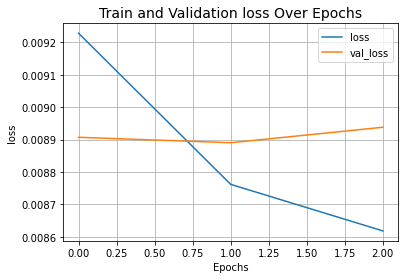

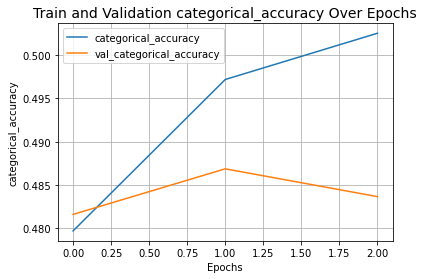

In [ ]:
def plot_result(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()


plot_result("loss")
plot_result("categorical_accuracy")

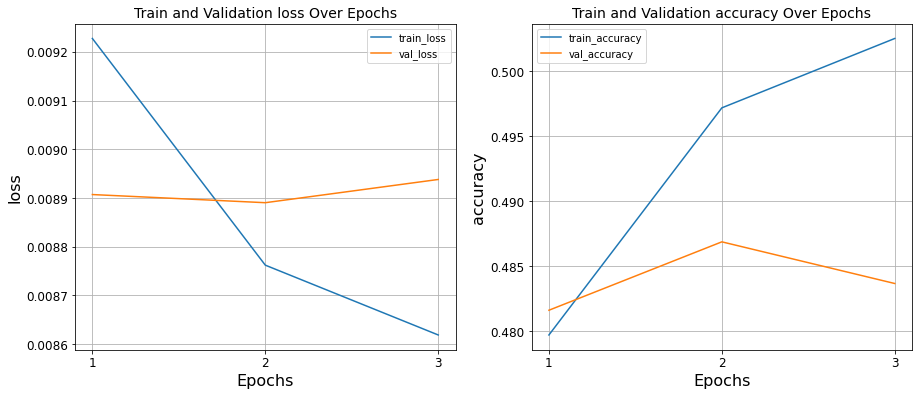

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1) 
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epochs", fontsize=16)
plt.ylabel("loss", fontsize=16)
plt.xticks(np.arange(a), np.arange(1, a+1), fontsize=12)
plt.yticks(fontsize=12)
plt.title("Train and Validation loss Over Epochs", fontsize=14)
plt.legend()
plt.grid()
# plt.show()
plt.subplot(1, 2, 2) 
plt.plot(history.history["categorical_accuracy"], label="train_accuracy")
plt.plot(history.history["val_categorical_accuracy"], label="val_accuracy")
plt.xlabel("Epochs",fontsize=16)
plt.ylabel("accuracy",fontsize=16)
plt.xticks(np.arange(a), np.arange(1, a+1), fontsize=12)
plt.yticks(fontsize=12)
plt.title("Train and Validation accuracy Over Epochs", fontsize=14)
plt.legend()
plt.grid()
#plt.savefig('cl_dl_gp_loss_50', dpi=50,  bbox_inches='tight', transparent=True, pad_inches=0)
#plt.savefig('cl_dl_gp_loss_400', dpi=400,  bbox_inches='tight', transparent=True, pad_inches=0)

plt.show()

In [ ]:
_, categorical_acc, f1_m, precision_m, recall_m = shallow_mlp_model.evaluate(test_dataset)
print(f"accuracy on the test set: {round(categorical_acc * 100, 2)}%.")
print(f"f1 on the test set: {round(f1_m * 100, 2)}%.")
print(f"precision on the test set: {round(precision_m * 100, 2)}%.")
print(f"recall on the test set: {round(recall_m * 100, 2)}%.")


4489/4489 [==============================] - 319s 71ms/step - loss: 0.0089 - categorical_accuracy: 0.4849 - f1_m: 0.4497 - precision_m: 0.7555 - recall_m: 0.3237 17s - loss: 0.008 - ETA: 11s - loss: 0.0089 - categorical_accuracy: 0.4853 - f1_m - ETA: 8s - loss: 0.0089 - categorical_accuracy: 0.4851 - f - ETA: 6s - loss: 0.0089 - 
accuracy on the test set: 48.49%.
f1 on the test set: 44.97%.
precision on the test set: 75.55%.
recall on the test set: 32.37%.


In [ ]:
model_for_inference = keras.Sequential([text_vectorizer, shallow_mlp_model])

In [ ]:
labels = tf.ragged.constant(test_df["cpc_subclass_list"].values)
label_binarized = lookup(labels).numpy()
dataset = test_df["Claim"].values

In [ ]:
label_binarized.shape

(143617, 665)

In [ ]:
predicted_probabilities = model_for_inference.predict(dataset)

In [ ]:
print(predicted_probabilities.shape)
print(label_binarized.shape)

(143617, 665)
(143617, 665)


In [ ]:
predicted_probabilities[0]
label_binarized[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
y_te_true = label_binarized

### Threshold results

In [ ]:
y_te_pred = [[1 if pred>=0.9 else 0 for pred in row] for row in predicted_probabilities]

### Top @ results

In [ ]:
top_k = 10

In [ ]:
y_te_pre = np.zeros_like(predicted_probabilities)
print(y_te_pre.shape)

(143617, 665)


In [ ]:
top_k_ind = [np.argpartition(x_in, -top_k)[-top_k:] for x_in in predicted_probabilities]
top_k_ind_arr = np.array(top_k_ind)

In [ ]:
for i in range(y_te_pre.shape[0]):
  a = y_te_pre[i]
  b = top_k_ind_arr[i]
  a[b] = 1
  y_te_pre[i] = a 

In [ ]:
from sklearn.metrics import f1_score, precision_score, accuracy_score, roc_curve, confusion_matrix, roc_auc_score, classification_report, recall_score

### Threshold

In [ ]:
precision_score(y_te_true, y_te_pred, average='micro')

0.9086424393337875

In [ ]:
recall_score(y_te_true, y_te_pred, average='micro')

0.13188446811484997

In [ ]:
f1_score(y_te_true, y_te_pred, average='micro')

0.23033681101424425

### Top@ results

In [ ]:
precision_score(y_te_true, y_te_pre, average='micro')

0.155466971180292

In [ ]:
recall_score(y_te_true, y_te_pre, average='micro')

0.761291840415702

In [ ]:
f1_score(y_te_true, y_te_pre, average='micro')

0.25820474287594314

In [ ]:
# Create a model for inference.
model_for_inference = keras.Sequential([text_vectorizer, shallow_mlp_model])

# Create a small dataset just for demoing inference.
inference_dataset = make_dataset(test_df.sample(100), is_train=False)
text_batch, label_batch = next(iter(inference_dataset))
predicted_probabilities = model_for_inference.predict(text_batch)

# Perform inference.
for i, text in enumerate(text_batch[:5]):
    label = label_batch[i].numpy()[None, ...]
    print(f"Abstract: {text[0]}")
    print(f"Label(s): {invert_multi_hot(label[0])}")
    predicted_proba = [proba for proba in predicted_probabilities[i]]
    top_3_labels = [
        x
        for _, x in sorted(
            zip(predicted_probabilities[i], lookup.get_vocabulary()),
            key=lambda pair: pair[0],
            reverse=True,
        )
    ][:3]
    print(f"Predicted Label(s): ({', '.join([label for label in top_3_labels])})")
    print(" ")

Abstract: b'1. A method of developing a website comprising: storing a website development application in memory; receiving a request for a questionnaire for developing the website; retrieving the questionnaire from the memory; transmitting the questionnaire to a website client, the questionnaire comprising questions for developing the website; receiving a response to the questionnaire and storing the response in the memory; examining the response for unanswered questions; flagging an error in the response; creating a calendar entry that corresponds to the error, the calendar entry comprising an event and a rule, with the event describing the error and the rule comprising a reminder of the event; retrieving a destination'
Label(s): ['G06Q']
Predicted Label(s): (G06Q, G06F, Y10S)
 
Abstract: b'1. A walking assistance device comprising an assisting force generator disposed at least on a side of a hip joint to provide an assisting force to a movement of a lower limb, comprising: a hip supp

In [ ]:
arxiv_data_ex = pd.read_csv(
    "https://github.com/soumik12345/multi-label-text-classification/releases/download/v0.2/arxiv_data.csv"
)
arxiv_data_ex.head()

,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"


In [ ]:
type(arxiv_data_ex['terms'][0])

str